In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
#Reading train data file
train = pd.read_csv("train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Reading test data file
test = pd.read_csv("test.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
ntr = train.shape[0]
#Combining train and test sets for convinience in pre-processing
total = pd.concat((train.drop("Loan_Status",axis=1),test),axis=0)
total.drop("Loan_ID",axis=1,inplace=True)
total.isnull().sum()


Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [5]:
#importing functions for pre-processing
from pre_processing import label_encode,impute

In [6]:
#imputing columns with missing values
to_impute = ["Married","Loan_Amount_Term","Gender","Dependents","LoanAmount","Self_Employed","Credit_History"]
for i in to_impute:
    impute(total,i)

imputing: Married
  It is categorical
imputing: Loan_Amount_Term


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


  It is categorical


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


imputing: Gender
  It is categorical
imputing: Dependents


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


  It is categorical


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


imputing: LoanAmount
  It is numerical
imputing: Self_Employed
  It is categorical
imputing: Credit_History


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


  It is categorical


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [7]:
#Indentifying categorical and continuous variables
con_var=[]
cat_var=[]
for i in total.columns:
    if(len(total[i].unique())>10):
        con_var.append(i)
    else:
        cat_var.append(i)
print(con_var)
print(cat_var)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']


In [13]:
for i in cat_var:
    label_encode(i,data=total)
total.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,0,6.124038,3.029876,5.972550,1.723791e+07,0,0
1,0,1,1,0,0,6.010755,9.243121,5.891056,1.723791e+07,0,1
2,0,1,0,0,1,5.810692,3.029876,4.937495,1.723791e+07,0,0
3,0,1,0,1,0,5.739252,9.945858,5.796220,1.723791e+07,0,0
4,0,0,0,0,0,6.135786,3.029876,6.034014,1.723791e+07,0,0


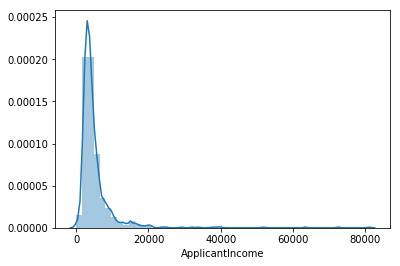

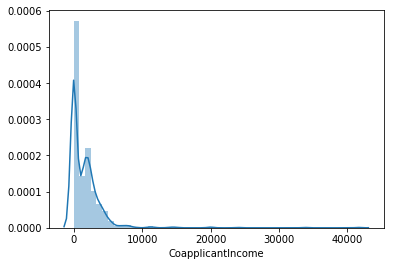

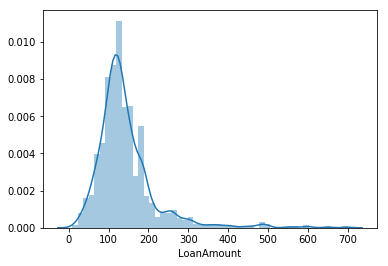

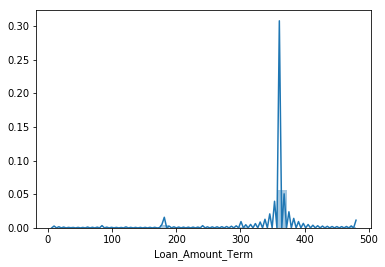

In [8]:
for i in con_var:
    plt.figure()
    sns.distplot(total[i])

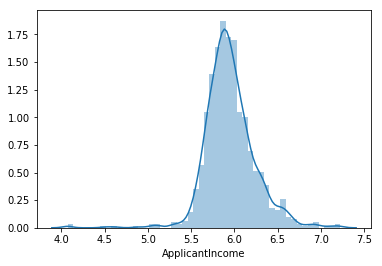

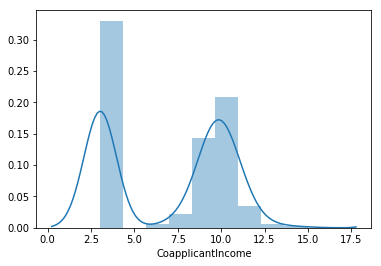

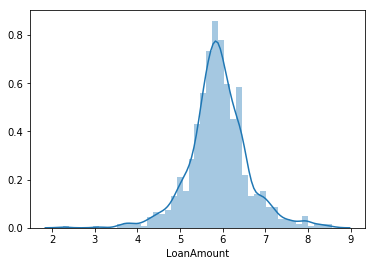

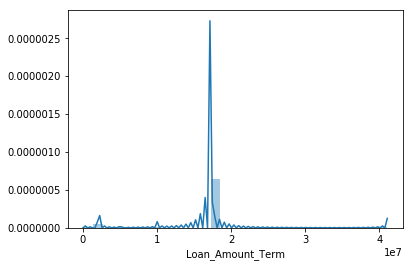

In [9]:
#Normalizing
from pre_processing import normalize
to_normalize = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for i in to_normalize:
    normalize(total,i)
for i in con_var:
    plt.figure()
    sns.distplot(total[i])

In [16]:
x = total.values[0:ntr,:]
y = train.Loan_Status.map({"Y":1,"N":0}).values
x_test = total.values[ntr:,:]

In [17]:
import xgboost as xgb
from xgboost import XGBClassifier as XGC
from xgboost import XGBRegressor as XGR
from sklearn.model_selection import GridSearchCV as GSV
xgc = XGC(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 seed=27)
    
    
print("Tuning scale_pos_weight")
params = {'scale_pos_weight':[0.5,1,2,5]}
gs=GSV(estimator=xgc,param_grid=params,cv=5,n_jobs=-1,verbose=5,scoring='f1')
gs.fit(x,y)
print(" ",gs.best_params_)
    
print("Tuning lr and n_estimators...")
params = {'learning_rate':[0.05,0.1,0.15,0.2],'n_estimators':[50,100,500]}
gs=GSV(estimator=xgc,param_grid=params,cv=5,n_jobs=-1,verbose=5,scoring='f1')
gs.fit(x,y)
print(" ",gs.best_params_)

        
print("Tuning depth and child weight...")
params={'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gs=GSV(estimator=gs.best_estimator_,param_grid=params,cv=5,n_jobs=-1,verbose=5,scoring='f1')
gs.fit(x,y)
print(" ",gs.best_params_)
        
print("Tuning gamma...")
params={'gamma':[i/10.0 for i in range(0,5)]}
gs=GSV(estimator=gs.best_estimator_,param_grid=params,cv=5,n_jobs=-1,verbose=5,scoring='f1')
gs.fit(x,y)
print(" ",gs.best_params_)
        
print("Tuning subsample and colsample...")
params={'subsample':[i/10.0 for i in range(6,10)],'colsample_bytree':[i/10.0 for i in range(6,10)]}
gs=GSV(estimator=gs.best_estimator_,param_grid=params,cv=5,n_jobs=-1,verbose=5,scoring='f1')
gs.fit(x,y)
print(" ",gs.best_params_)
        
print("Tuning reg_alpha...")
params={'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}
gs=GSV(estimator=gs.best_estimator_,param_grid=params,cv=5,n_jobs=-1,verbose=5,scoring='f1')
gs.fit(x,y)
print(" ",gs.best_params_)
        

Tuning scale_pos_weight
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:   11.7s remaining:   11.7s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:  1.6min remaining:   31.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.7min finished


  {'scale_pos_weight': 5}
Tuning lr and n_estimators...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:  1.6min remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.7min finished


  {'learning_rate': 0.05, 'n_estimators': 50}
Tuning depth and child weight...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:   34.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   36.3s finished


  {'max_depth': 3, 'min_child_weight': 3}
Tuning gamma...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:    9.9s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:   35.8s remaining:    4.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   36.1s finished


  {'gamma': 0.0}
Tuning subsample and colsample...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.5min finished


  {'colsample_bytree': 0.6, 'subsample': 0.6}
Tuning reg_alpha...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:   12.4s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:   36.7s remaining:    4.9s


  {'reg_alpha': 1e-05}


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   37.8s finished


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_eval,y_train,y_eval=train_test_split(x,y,test_size=0.25,stratify=y,random_state=10)
xgc = gs.best_estimator_
xgc.fit(x_train,y_train)
from sklearn.metrics import f1_score

p = [0.48,0.49,0.5,0.51,0.52]
for cutoff in p:
    y_pred = (xgc.predict_proba(x_eval)[:,1] > cutoff).astype(np.int)
    print("For cutoff:",cutoff,", validation f1_score = ",f1_score(y_eval,y_pred))

For cutoff: 0.48 , validation f1_score =  0.8655462184873949
For cutoff: 0.49 , validation f1_score =  0.8655462184873949
For cutoff: 0.5 , validation f1_score =  0.8655462184873949
For cutoff: 0.51 , validation f1_score =  0.8655462184873949
For cutoff: 0.52 , validation f1_score =  0.8655462184873949


In [20]:
ans = pd.read_csv("sample_submission.csv")
ans.Loan_Status = xgc.predict(x_test)
ans.Loan_status = ans.Loan_Status.map({1:"Y",0:"N"})
ans.Loan_ID = test.Loan_ID.values
ans.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [21]:
ans.to_csv("ans1.csv",index=False)